### My Machine Learning Workflow

- Import Libraries
- Import Data
- Look at top 10 values to see how data looks like
- Data Frame Profiling
    - Looking at shape
    - Talk to domain expert
    - Count NA values in each column and replacing them if needed
    - Data cleaning
    - Describing numerical variables
    - Checking for outliers using boxplots and removing them
- Machine Learning
    - Correlation Heatmap
    - Feature Engineering (https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)
    - Checking assumptions of the model, thinking about parameters
    - Applying ML algorithm
    - Drawing real and predicted outputs for graphical understanding
    - Improving the model and sharing outputs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity
df = pd.read_csv('qsar_aquatic_toxicity.csv',
                 sep = ';',
                 header = None,
                 names = ['TPSA', 'SA_Acc', 'H050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040', 'LC50-Response'])

In [3]:
print(df.shape)

(546, 9)


In [4]:
df.head(10)

,TPSA,SA_Acc,H050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50-Response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
5,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064
6,9.23,11.000,0,2.723,2.321,1.165,0,0,7.337
7,0.00,0.000,0,3.267,2.318,0.963,0,0,4.100
8,0.00,0.000,0,2.067,1.800,1.250,0,0,3.941
9,0.00,0.000,0,2.746,1.667,1.400,0,0,3.809


In [5]:
df.dtypes

TPSA             float64
SA_Acc           float64
H050               int64
MLOGP            float64
RDCHI            float64
GATS1p           float64
nN                 int64
C-040              int64
LC50-Response    float64
dtype: object

In [6]:
df.isnull().sum()

TPSA             0
SA_Acc           0
H050             0
MLOGP            0
RDCHI            0
GATS1p           0
nN               0
C-040            0
LC50-Response    0
dtype: int64

In [7]:
df.describe()

,TPSA,SA_Acc,H050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50-Response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


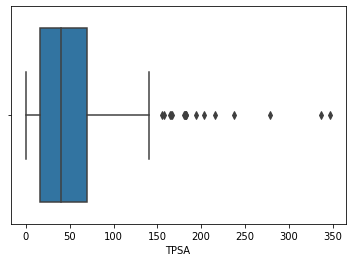

In [8]:
#outliers detection
sns.boxplot(df['TPSA'])

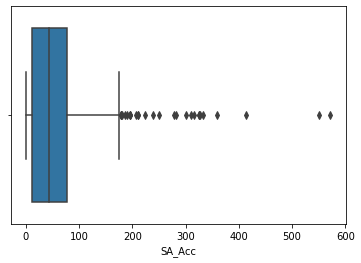

In [9]:
sns.boxplot(df['SA_Acc'])

In [10]:
df = df[(df['SA_Acc'] < 170) & (df['TPSA'] < 140)]
df = df[df>0]
for col in df.columns:
    df[col] = df[col].fillna(np.mean(df[col]))

In [11]:
df.sample(10)

,TPSA,SA_Acc,H050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50-Response
261,26.020000,32.897000,2.000000,2.729,1.975,0.462,1.000000,1.309735,4.742
249,51.003923,58.955165,1.656109,5.472,2.676,0.577,1.884921,1.309735,5.640
387,44.450000,16.786000,1.656109,3.648,2.427,0.757,1.000000,1.000000,6.099
322,58.200000,116.232000,2.000000,3.508,3.281,0.803,2.000000,1.000000,7.802
187,94.890000,20.765000,1.656109,2.492,2.659,1.194,1.884921,1.309735,6.790
453,52.600000,72.290000,1.656109,6.338,4.160,1.402,1.884921,2.000000,6.194
507,51.003923,58.955165,1.656109,4.366,2.031,0.570,1.884921,1.309735,5.550
523,20.310000,28.269000,1.656109,0.198,1.782,1.559,1.000000,1.000000,4.906
380,40.460000,85.367000,2.000000,3.635,3.120,1.030,1.884921,1.309735,4.962
266,41.570000,57.280000,1.000000,3.180,3.292,1.014,2.000000,1.309735,4.992


In [12]:
#feature engineering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:len(df.columns) - 1]
y = df['LC50-Response'].astype('int64')

#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 8 best features

    Specs       Score
0    TPSA  572.025603
1  SA_Acc  290.752617
3   MLOGP   99.320650
4   RDCHI   26.721916
5  GATS1p   19.312892
6      nN    6.389768
2    H050    2.096531
7   C-040    1.197322


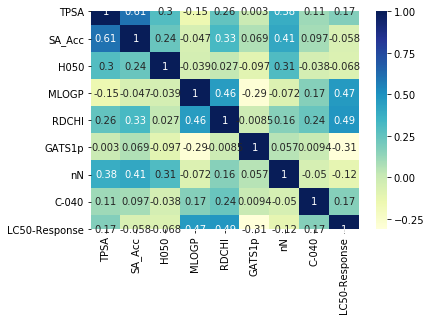

In [13]:
sns.heatmap(df.corr(),
            annot = True,
           cmap = 'YlGnBu')
#thus there is no problem of multicollinearity in the data as no corr value > 0.8

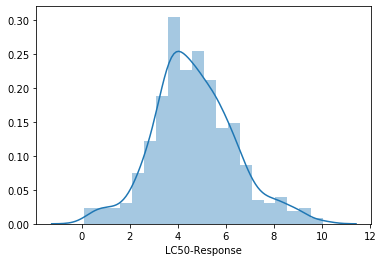

In [14]:
sns.distplot(df['LC50-Response'])

In [15]:
#standardisation
for col in df.columns:
    df[col] = (df[col] - np.mean(df[col]))/np.std(df[col])

In [16]:
df.sample(10)

,TPSA,SA_Acc,H050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50-Response
104,5.668993e-02,4.164421e-01,-8.892435e-15,-0.074271,0.417943,0.682705,2.718176e-15,3.062716e+00,-0.641718
31,2.523727e-16,-3.106599e-15,-8.892435e-15,-0.327914,-1.614945,-1.147739,2.718176e-15,1.182258e-14,-0.573481
240,2.523727e-16,-3.106599e-15,-8.892435e-15,2.566943,0.447549,-1.337436,2.718176e-15,1.182258e-14,1.735901
0,2.523727e-16,-3.106599e-15,-8.892435e-15,-0.188446,-1.671336,-0.908772,2.718176e-15,1.182258e-14,-0.560427
483,5.685086e-01,3.743133e-01,5.987892e-01,-1.176282,0.374241,0.249114,1.365033e+00,1.182258e-14,0.851192
256,2.523727e-16,-3.106599e-15,-8.892435e-15,0.999558,-0.614008,-1.322654,2.718176e-15,1.182258e-14,0.086342
53,2.161860e+00,2.661447e+00,-1.142427e+00,0.016058,0.303752,0.027391,1.408753e-01,1.182258e-14,0.780581
214,2.523727e-16,-3.106599e-15,-8.892435e-15,0.441687,-1.214570,2.375189,2.718176e-15,1.182258e-14,0.143899
247,-1.093037e+00,-5.081738e-01,-1.142427e+00,0.458308,-0.535061,-1.544377,2.718176e-15,1.182258e-14,0.106517
351,-4.867401e-01,2.770955e-01,-1.142427e+00,1.350033,0.973393,0.249114,2.718176e-15,-1.374296e+00,-0.073867


In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
X = df[['TPSA','SA_Acc','MLOGP', 'RDCHI', 'GATS1p']]
y = df['LC50-Response']

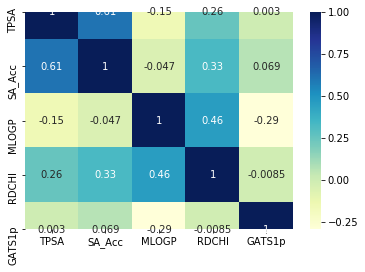

In [19]:
sns.heatmap(X.corr(),
            annot = True,
           cmap = 'YlGnBu')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lr.coef_

array([ 0.32563831, -0.3426428 ,  0.24422336,  0.42559324, -0.22794262])

In [23]:
lr.score(X_train, y_train)

0.47244060173098806

In [24]:
y_pred = lr.predict(X_test)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5564352910316233
Mean Squared Error: 0.6334052773458884
Root Mean Squared Error: 0.7958676255168873


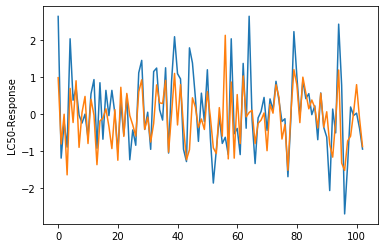

In [26]:
ax = sns.lineplot(x = range(len(y_test)), y = y_test)
ax = sns.lineplot(x = range(len(y_test)), y = y_pred)

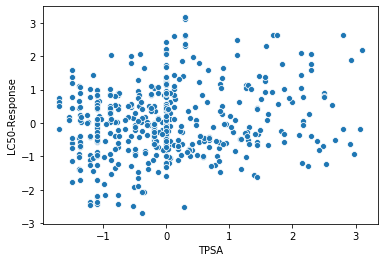

In [27]:
#checking assumptions of linear model
sns.scatterplot(x = df['TPSA'], y = df['LC50-Response']) #no linear relationship here clearly

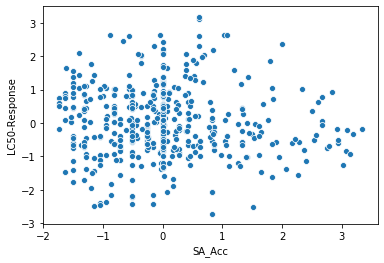

In [28]:
sns.scatterplot(x = df['SA_Acc'], y = df['LC50-Response'])

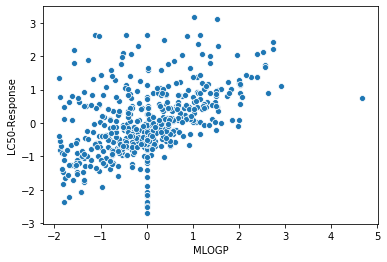

In [29]:
sns.scatterplot(x = df['MLOGP'], y = df['LC50-Response'])

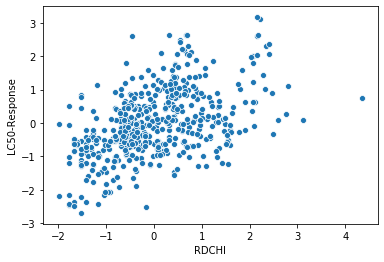

In [30]:
sns.scatterplot(x = df['RDCHI'], y = df['LC50-Response'])

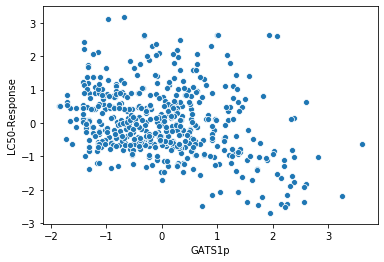

In [31]:
sns.scatterplot(x = df['GATS1p'], y = df['LC50-Response'])

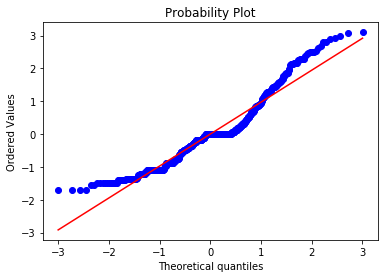

In [32]:
import scipy.stats as stats

#if q q plot follows the red line, it's normal, else not
stats.probplot(df['TPSA'], dist="norm", plot=plt)
plt.show()

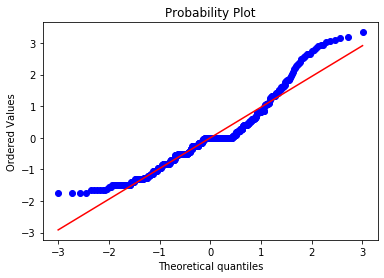

In [33]:
stats.probplot(df['SA_Acc'], dist="norm", plot=plt)
plt.show()

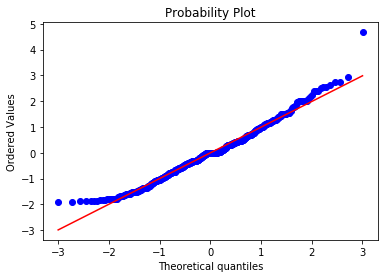

In [34]:
stats.probplot(df['MLOGP'], dist="norm", plot=plt)
plt.show()

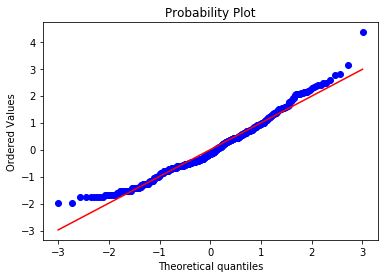

In [35]:
stats.probplot(df['RDCHI'], dist="norm", plot=plt)
plt.show()

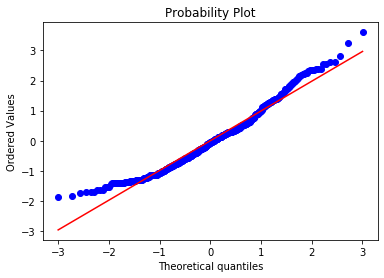

In [36]:
stats.probplot(df['GATS1p'], dist="norm", plot=plt)
plt.show()

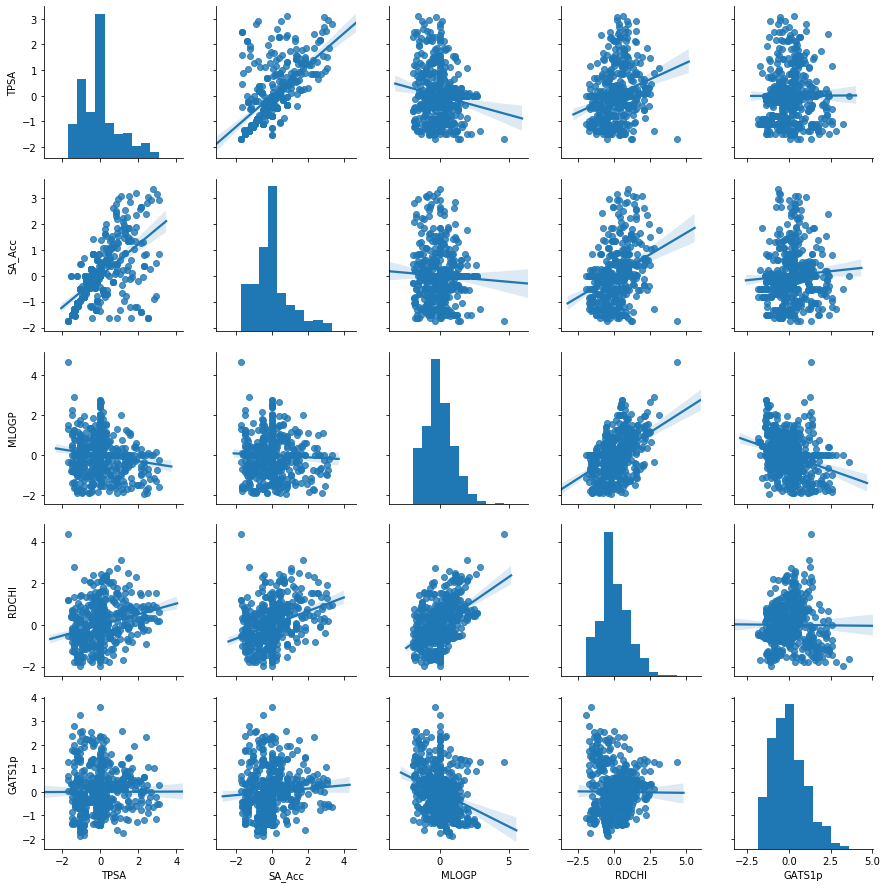

In [37]:
sns.pairplot(X, kind='reg')

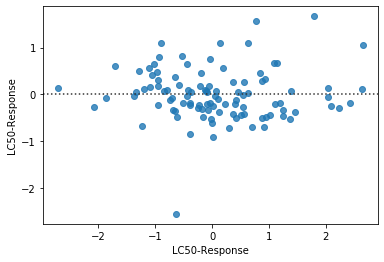

In [38]:
#residual plot, this shows that data set doesn't suffer from heteroskedasticity and autocorrelation
sns.residplot(x = y_test, y = y_test - y_pred)

In [39]:
error = y_test - y_pred

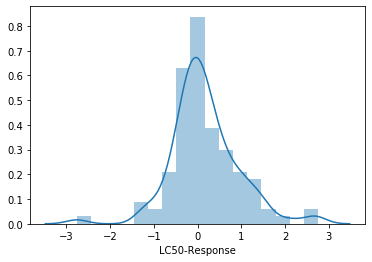

In [40]:
#error follows normal distribution
sns.distplot(error)

In [41]:
#the mean of erro is close to zero
np.mean(error)

0.17086086732833752